7 interesting facts about decision trees:

.They do not need the numerical input data to be scaled. Whatever the numerical values are, decision trees don't care.

.Decision trees handle categorical features in the raw text format (Scikit-Learn doesn't support this, TensorFlow's trees implementation does).

.Different to other complex learning algorithms, the results of decision trees can be interpreted. It's fair to say that decision trees are not blackbox type models.

.While most models will suffer from missing values, decision trees are okay with them.

.Trees can handle imbalanced datasets. You will only have to adjust the weights of the classes.

.Trees can provide the feature importances or how much each feature contributed to the model training results.

.Trees are the basic building blocks of ensemble methods such as random forests and gradient boosting machines.

A well-known downside of decision trees is that they tend to overfit the data easily(pretty much assumed they will always overfit at first). One way to overcome overfitting is to reduce the maximum depth of the decision tree (refered to as max_depthhyperparameter) in decision trees.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
car_data = fetch_openml(name='car', version=2)

In [3]:
type(car_data)

sklearn.utils._bunch.Bunch

In [4]:
car_data.details

{'id': '991',
 'name': 'car',
 'version': '2',
 'description_version': '1',
 'format': 'ARFF',
 'upload_date': '2014-10-04T22:44:31',
 'licence': 'Public',
 'url': 'https://api.openml.org/data/v1/download/53525/car.arff',
 'parquet_url': 'https://openml1.win.tue.nl/datasets/0000/0991/dataset_991.pq',
 'file_id': '53525',
 'default_target_attribute': 'binaryClass',
 'tag': ['Chemistry',
  'derived',
  'Life Science',
  'mythbusting_1',
  'study_1',
  'study_15',
  'study_20',
  'study_41',
  'study_7'],
 'visibility': 'public',
 'minio_url': 'https://openml1.win.tue.nl/datasets/0000/0991/dataset_991.pq',
 'status': 'active',
 'processing_date': '2020-11-20 20:17:54',
 'md5_checksum': '49c57b793eef1b8e55f297e5e019fdbf'}

In [5]:
car_data.details['version']

'2'

In [6]:
print(car_data.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

Binarized version of the original data set (see version 1). The multi-class target feature is converted to a two-class nominal target feature by re-labeling the majority class as positive ('P') and all others as negative ('N'). Originally converted by Quan Sun.

Downloaded from openml.org.


In [7]:
# Displaying feature names

car_data.feature_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [8]:
# Getting the whole dataframe

car_data = car_data.frame
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
0,vhigh,vhigh,2,2,small,low,P
1,vhigh,vhigh,2,2,small,med,P
2,vhigh,vhigh,2,2,small,high,P
3,vhigh,vhigh,2,2,med,low,P
4,vhigh,vhigh,2,2,med,med,P


In [9]:
type(car_data)

pandas.core.frame.DataFrame

Splitting Data into Training and Test sets

In [10]:
train_data, test_data = train_test_split(car_data, test_size=0.1,random_state=20)

print(f'The size of training data is: {len(train_data)} \nThe size of testing data is: {len(test_data)}')

The size of training data is: 1555 
The size of testing data is: 173


Exploratory Analysis

In [11]:
train_data.describe()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
count,1555,1555,1555,1555,1555,1555,1555
unique,4,4,4,3,3,3,2
top,med,low,2,2,med,low,P
freq,402,392,393,521,522,528,1097


In [12]:
# Checking missing values
train_data.isnull().sum()

buying         0
maint          0
doors          0
persons        0
lug_boot       0
safety         0
binaryClass    0
dtype: int64

Checking Categorical Features

In [13]:
train_data['buying'].value_counts()

buying
med      402
vhigh    387
high     385
low      381
Name: count, dtype: int64

<Axes: xlabel='buying', ylabel='count'>

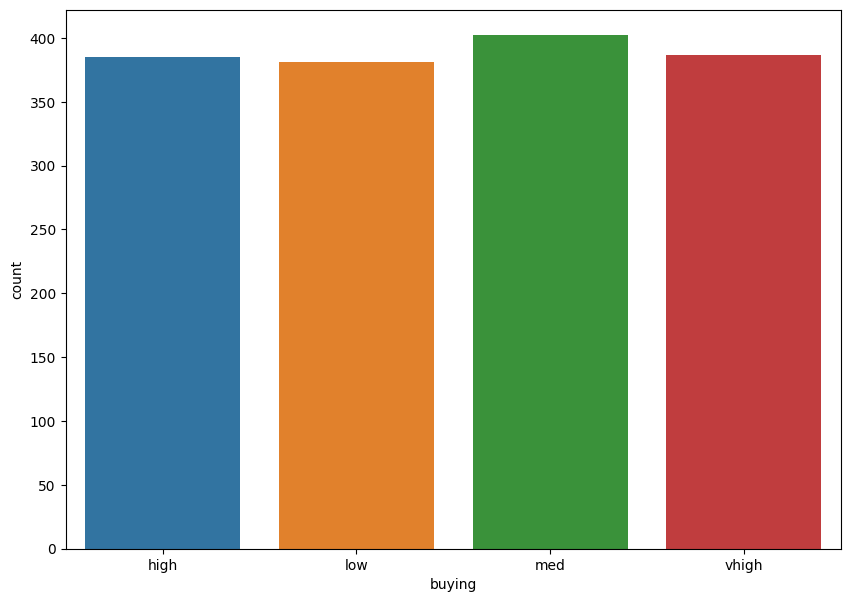

In [14]:
plt.figure(figsize=(10,7))
sns.countplot(data=train_data, x='buying')

<Axes: xlabel='buying', ylabel='count'>

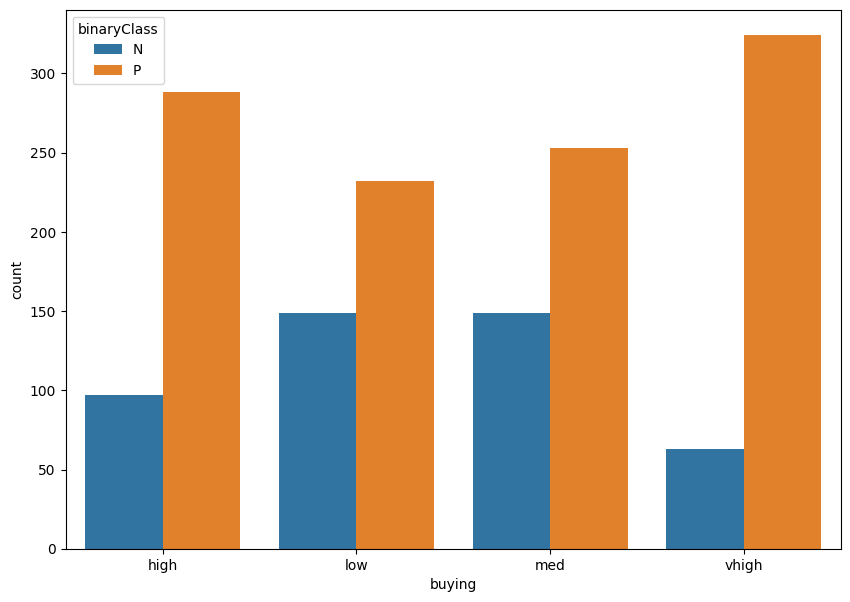

In [15]:
plt.figure(figsize=(10,7))
sns.countplot(data=train_data, x='buying', hue='binaryClass')

As you can see above, the majority class in the buying price is median(med).

In [17]:
train_data['maint'].value_counts()

maint
low      392
med      390
high     387
vhigh    386
Name: count, dtype: int64

<Axes: xlabel='maint', ylabel='count'>

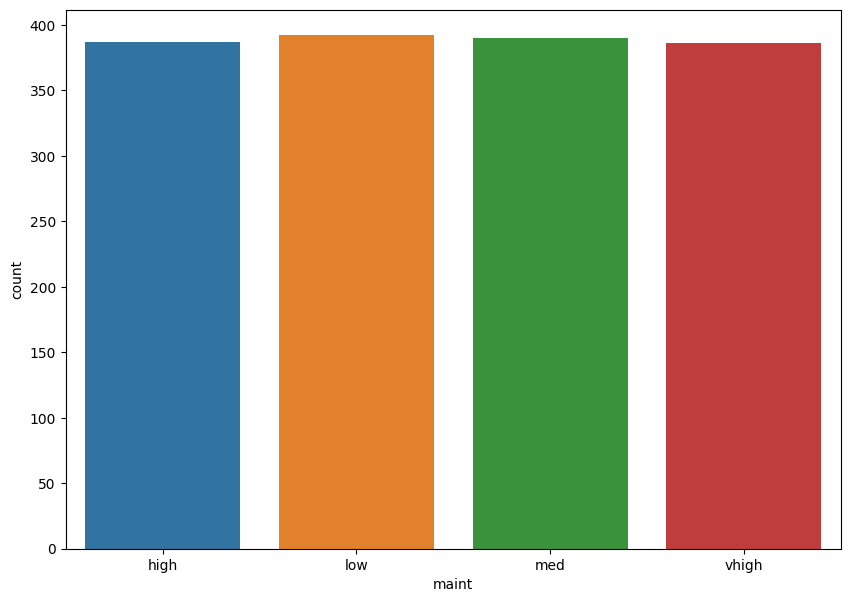

In [18]:
plt.figure(figsize=(10,7))
sns.countplot(data=train_data, x='maint')

<Axes: xlabel='maint', ylabel='count'>

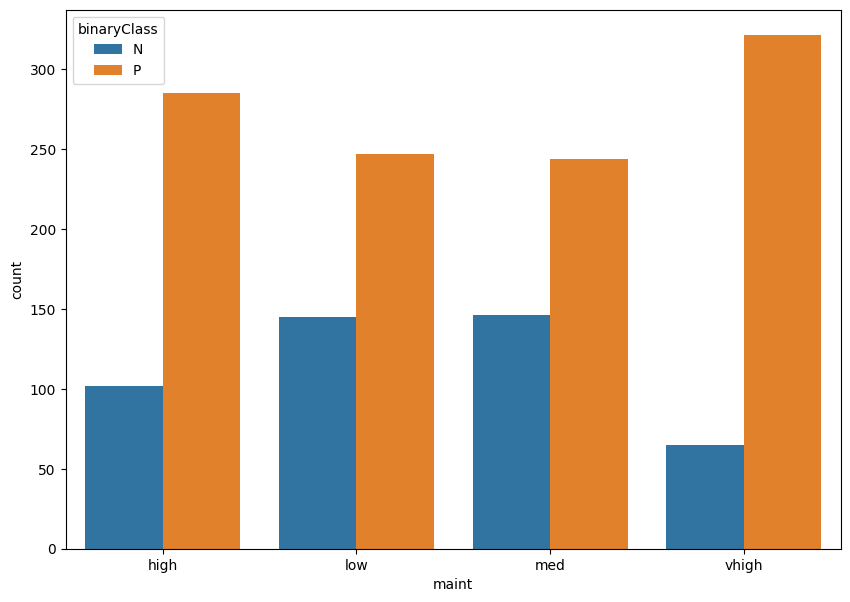

In [19]:
plt.figure(figsize=(10,7))
sns.countplot(data=train_data, x='maint', hue='binaryClass')

Nothing stunning in the maintenance cost. All cars share the same maintenance costs.

In [20]:
train_data['persons'].value_counts()

persons
2       521
more    521
4       513
Name: count, dtype: int64

<Axes: xlabel='persons', ylabel='count'>

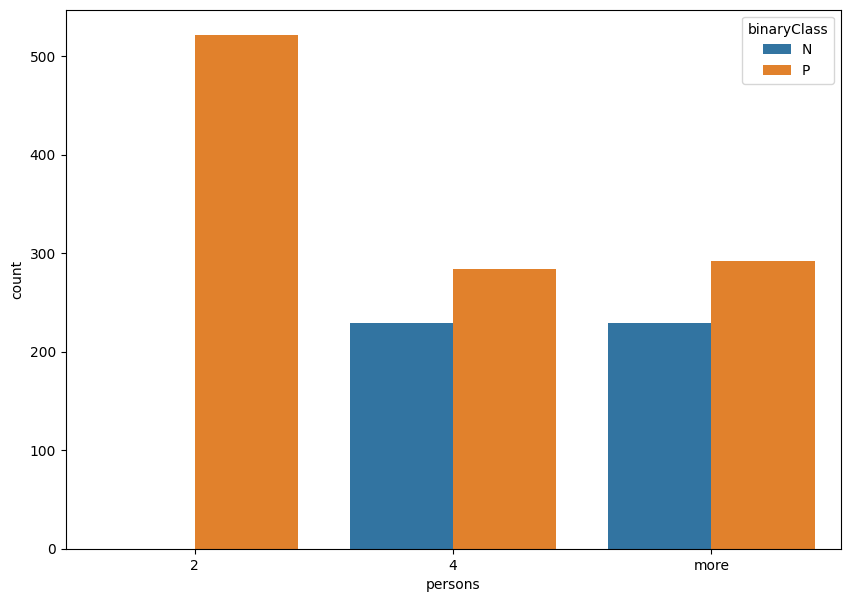

In [21]:
plt.figure(figsize=(10,7))
sns.countplot(data=train_data, x='persons', hue='binaryClass')

In [22]:
train_data['lug_boot'].value_counts()

lug_boot
med      522
small    517
big      516
Name: count, dtype: int64

<Axes: xlabel='lug_boot', ylabel='count'>

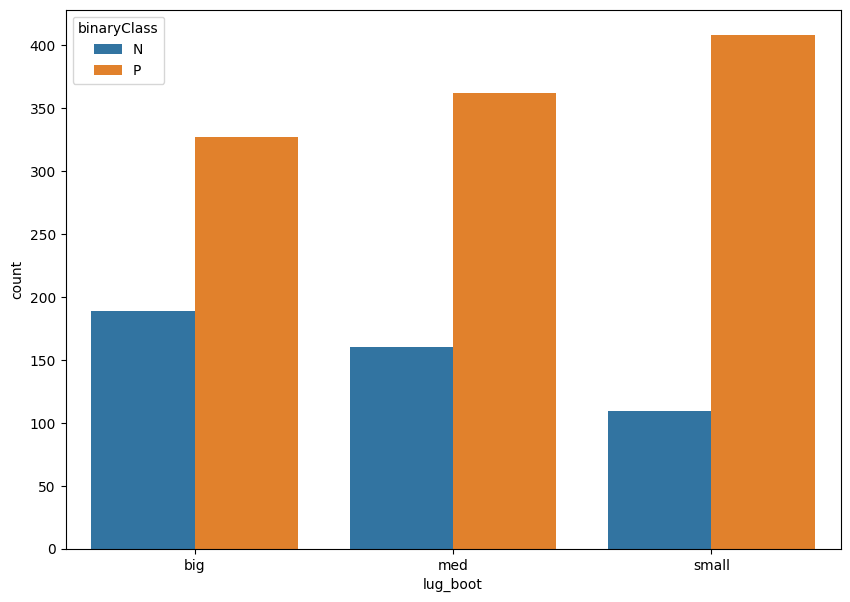

In [23]:
plt.figure(figsize=(10,7))
sns.countplot(data=train_data, x='lug_boot', hue='binaryClass')

In [24]:
train_data['safety'].value_counts()

safety
low     528
high    514
med     513
Name: count, dtype: int64

<Axes: xlabel='safety', ylabel='count'>

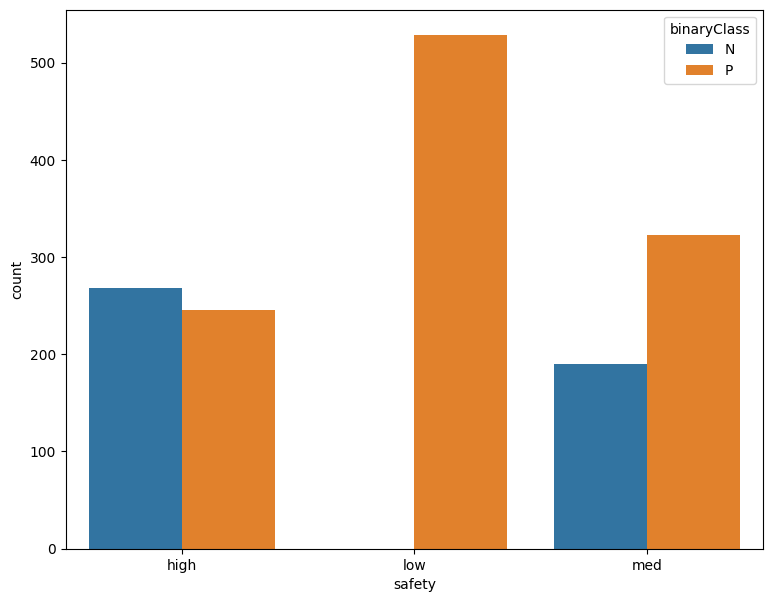

In [25]:
plt.figure(figsize=(9,7))
sns.countplot(data=train_data, x='safety', hue='binaryClass')

In [26]:
train_data['binaryClass'].value_counts()

binaryClass
P    1097
N     458
Name: count, dtype: int64

<Axes: xlabel='binaryClass', ylabel='count'>

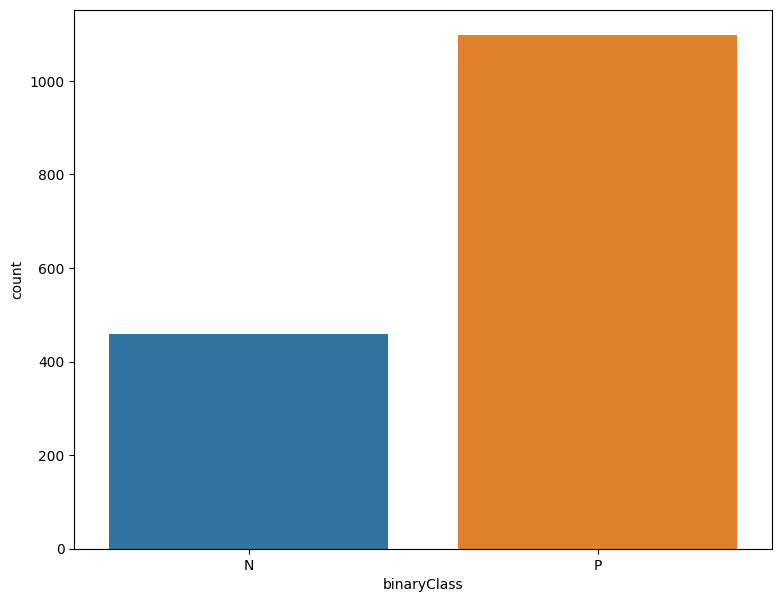

In [27]:
plt.figure(figsize=(9,7))
sns.countplot(data=train_data, x='binaryClass')

Our data is completely skewed/imbalanced. The positive examples are 2x more than negative examples.

Accuracy is not the right metric in this case. Real world datasets comes with their unique blends, dataset can be imbalanced. Missing values can be present. We just have to find the effective way to deal with those issues. So again for evaluation, we will not rely on accuracy

Data Preprocessing

Create a training input data and labels

In [28]:
car_train = train_data.drop('binaryClass', axis=1)
car_labels = train_data[['binaryClass']]

Create a pipeline to encode all features in the training input data

In [29]:
from sklearn.preprocessing import OrdinalEncoder

from sklearn.pipeline import Pipeline


pipe = Pipeline([
    ('ord_enc', OrdinalEncoder())
    
])

car_train_prepared = pipe.fit_transform(car_train)

Convert our labels into numerical values using label encoder

In [30]:
from sklearn.preprocessing import LabelEncoder


label_enc = LabelEncoder()

car_labels_prepared = label_enc.fit_transform(car_labels)

Training Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()

tree_clf.fit(car_train_prepared, car_labels_prepared)

DecisionTreeClassifier()

Training the same model on the scaled data

In [32]:
# if you run this, it will be error. 
# SKlearn tree implementation doesn't support categorical features

# from sklearn.tree import DecisionTreeClassifier

# tree_clf = DecisionTreeClassifier()

# tree_clf.fit(car_train, car_labels)

Evaluating Decision Trees

Let's build 3 functions to display accuracy, confusion matrix, and classification report

In [33]:
from sklearn.metrics import accuracy_score

def accuracy(input_data,model,labels):
    """
    Take the input data, model and labels and return accuracy
    
    """
    
    preds = model.predict(input_data)
    acc = accuracy_score(labels,preds)
    
    return acc

In [34]:
from sklearn.metrics import confusion_matrix

def conf_matrix(input_data,model,labels):
    """
    Take the input data, model and labels and return confusion matrix
    
    """
    
    preds = model.predict(input_data)
    cm = confusion_matrix(labels,preds)
    
    return cm

In [35]:
from sklearn.metrics import classification_report

def class_report(input_data,model,labels):
    """
    Take the input data, model and labels and return confusion matrix
    
    """
    
    preds = model.predict(input_data)
    report = classification_report(labels,preds)
    report = print(report)
    
    return report

In [36]:
accuracy(car_train_prepared, tree_clf, car_labels_prepared)

1.0

The decision trees overfitted the dataset. Also if we remember well, our data is not balanced. We have many positive examples than negative examples.

In [37]:
conf_matrix(car_train_prepared, tree_clf, car_labels_prepared)

array([[ 458,    0],
       [   0, 1097]], dtype=int64)

In [38]:
class_report(car_train_prepared, tree_clf, car_labels_prepared)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       458
           1       1.00      1.00      1.00      1097

    accuracy                           1.00      1555
   macro avg       1.00      1.00      1.00      1555
weighted avg       1.00      1.00      1.00      1555



Improving Decision Trees

In [39]:
tree_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

One way to avoid overfitting is reduce number maximum depth of the tree, set by the hyperparameter max_depth. Similarly, we can attempt to reduce all hyperparameters with maxterm while also increasing the min_ term parameters

Also,the class_weight was set to balanced because our dataset is imbalanced. By setting it to balanced, the model will automatically adjust the class weight based on the number of available samples in all classes.

Let's use GridSearch to find best values of these hyperparameters

In [40]:
# Let's hide warnings returned by grid search

import warnings
warnings.filterwarnings('ignore')

In [41]:
from sklearn.model_selection import GridSearchCV

params_grid = {'max_leaf_nodes': list(range(0, 10)), 
               'min_samples_split': [0,1,2, 3, 4], 
               'min_samples_leaf': [0,1,2, 3, 4], 
               'max_depth':[0,1,2,3,4,5],
               'max_features':[0,1,2,3,4,5],
              'max_leaf_nodes':[0,1,2,3,4,5]}

#refit is true by default. The best estimator is trained on the whole dataset 

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42, class_weight='balanced'), params_grid, verbose=1, cv=3, refit=True)

grid_search.fit(car_train_prepared, car_labels_prepared)

Fitting 3 folds for each of 5400 candidates, totalling 16200 fits


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [0, 1, 2, 3, 4, 5],
                         'max_features': [0, 1, 2, 3, 4, 5],
                         'max_leaf_nodes': [0, 1, 2, 3, 4, 5],
                         'min_samples_leaf': [0, 1, 2, 3, 4],
                         'min_samples_split': [0, 1, 2, 3, 4]},
             verbose=1)

In [42]:
grid_search.best_params_

{'max_depth': 4,
 'max_features': 5,
 'max_leaf_nodes': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [43]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=4, max_features=5,
                       max_leaf_nodes=5, random_state=42)

In [44]:
tree_best = grid_search.best_estimator_

We can also plot the tree of the improved model

In [45]:
car_data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'binaryClass'],
      dtype='object')

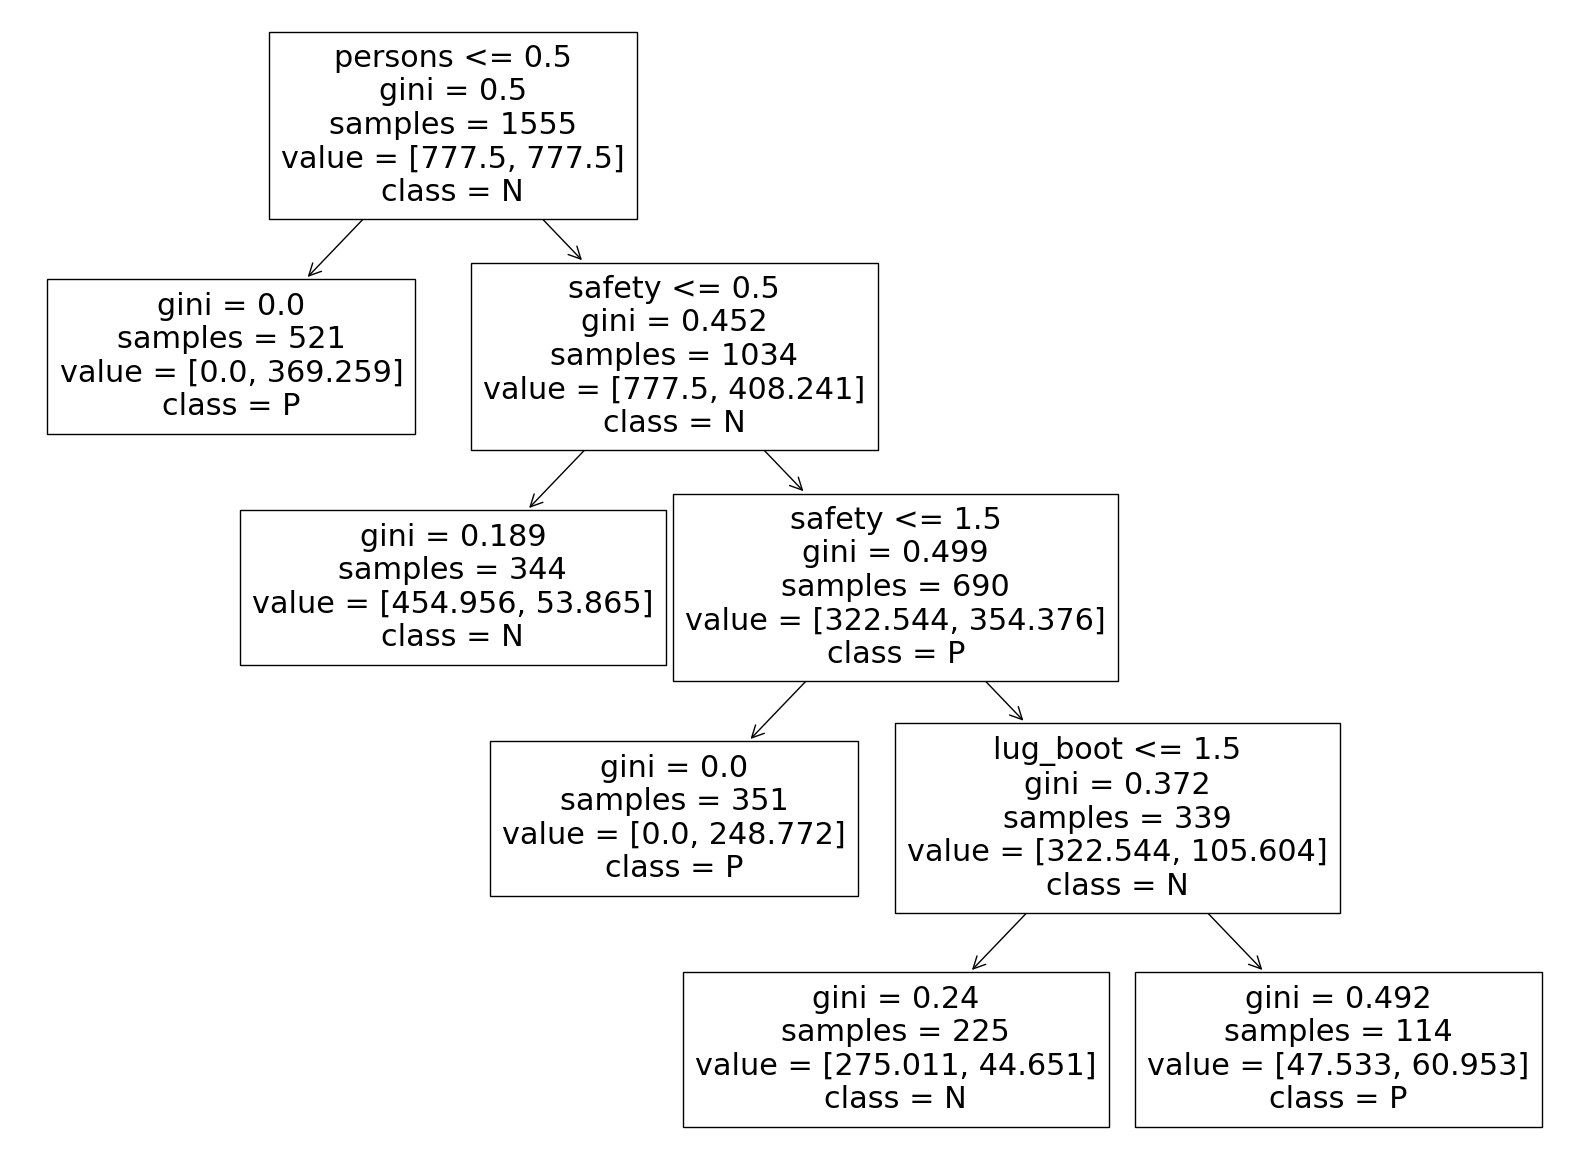

In [46]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,15))
plot_tree(tree_best, feature_names=car_train.columns, class_names=['N','P']);

In [47]:
accuracy(car_train_prepared, tree_best, car_labels_prepared)

0.8926045016077171

In [48]:
conf_matrix(car_train_prepared, tree_best, car_labels_prepared)

array([[430,  28],
       [139, 958]], dtype=int64)

In confusion matrix, each row represent an actual class and each column represents predicted class

So, from the results above:

430 negative examples(N) were correcty predicted as negatives(true negatives).
28 negatives examples(N) were incorrectly classified as positive examples when they are in fact negatives(false positives).
139 positive examples were incorrectly classified as negative(N) when in fact they are positives(P) (false negatives).
958 were correctly classified as positive examples(true positives)

In [49]:
class_report(car_train_prepared, tree_best, car_labels_prepared)

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       458
           1       0.97      0.87      0.92      1097

    accuracy                           0.89      1555
   macro avg       0.86      0.91      0.88      1555
weighted avg       0.91      0.89      0.90      1555



This is much better. By only setting the class weight to balanced and finding the best values of the hyperparameters, we were able to improve our model

A few notes about Precison/Recall/F1 score:

Precision is the model accuracy on predicting positive examples correctly.
Recall is the ratio of the positive examples that are correctly identified by the model.

F1 score is the harmonic mean of precision and recall

The higher the precision and recall are, the higher the F1 score. But there is a tradeoff between them. Increasing precision will reduce recall, and vice versa. So it's fair to say that it depends on the problem you're trying to solve and the metrics you want to optimize for

Evaluating the model on the test set

It is only after we have improved the model that we can feed it to the test set. If we try to show the test set to the model while we are still training, we may cause a potential leak thus producing misleading predictions

In [50]:
car_test = test_data.drop('binaryClass', axis=1)
car_test_labels = test_data['binaryClass']

In [51]:
# Handling the categorical features with the pipeline that we defined early
# We don't fit on the test data. Only transform

car_test_prepared = pipe.transform(car_test)

In [52]:
# Handle labels too

car_test_labels_prepared = label_enc.transform(car_test_labels)

Now we can make predictions on the test set. We will only have to call the metrics functions we created previously

In [53]:
accuracy(car_test_prepared, tree_best, car_test_labels_prepared)

0.8554913294797688